In [1]:
from dask.distributed import LocalCluster, Client
cluster = LocalCluster()
client = Client(cluster)
client

/home/edavenport/miniconda3/envs/mitgcm_analysis/lib/python3.12/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 33447 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:33447/status,
Dashboard: http://127.0.0.1:33447/status,Workers: 16
Total threads: 128,Total memory: 0.98 TiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:40057,Workers: 16
Dashboard: http://127.0.0.1:33447/status,Total threads: 128
Started: Just now,Total memory: 0.98 TiB
Comm: tcp://127.0.0.1:39217,Total threads: 8
Dashboard: http://127.0.0.1:46075/status,Memory: 62.93 GiB
Nanny: tcp://127.0.0.1:42831,


In [43]:
import matplotlib.pyplot as plt
import cmocean.cm as cmo
import xarray as xr
import numpy as np
from controls_utils import load_controls_and_sensitivities

data_dir = '/data/SO3/edavenport/tpose6/sep2012/run_ad/'
grid_dir = '/data/SO6/TPOSE_diags/tpose6/grid_6/'

iteration = 1

In [44]:
# Load all control variables and sensitivities into a Dataset
# This automatically loads grid information and applies proper MITgcm coordinate names
ds = load_controls_and_sensitivities(data_dir, grid_dir, iteration)

print(f"Loaded Dataset with {len(ds.data_vars)} variables:")
for name, da in ds.data_vars.items():
    print(f"  {name}: {da.dims} {da.shape}")
    
print(f"\nDataset coordinates: {list(ds.coords.keys())}")
print(f"\nSample variable dimensions:")
print(f"  Ocean variables (3D): Z, YC, XC")
print(f"  Atmospheric variables (time-dependent): time, YC, XC")

Loaded Dataset with 9 variables:
  xx_theta: ('Z', 'YC', 'XC') (66, 336, 1128)
  xx_salt: ('Z', 'YC', 'XC') (66, 336, 1128)
  xx_uwind: ('time', 'YC', 'XC') (14, 336, 1128)
  xx_vwind: ('time', 'YC', 'XC') (14, 336, 1128)
  xx_atemp: ('time', 'YC', 'XC') (14, 336, 1128)
  xx_aqh: ('time', 'YC', 'XC') (14, 336, 1128)
  xx_lwdown: ('time', 'YC', 'XC') (14, 336, 1128)
  xx_precip: ('time', 'YC', 'XC') (14, 336, 1128)
  xx_swdown: ('time', 'YC', 'XC') (14, 336, 1128)

Dataset coordinates: ['Z', 'YC', 'XC', 'time', 'XG', 'YG', 'drF', 'PHrefC', 'rhoRef', 'Zl', 'dyG', 'dxC', 'rAw', 'dxG', 'dyC', 'rAs']

Sample variable dimensions:
  Ocean variables (3D): Z, YC, XC
  Atmospheric variables (time-dependent): time, YC, XC


In [46]:
print(ds)
ds['XC'] = ds.XC.astype(float)
ds['YC'] = ds.YC.astype(float)
ds['Z'] = ds.Z.astype(float)
ds['XG'] = ds.XG.astype(float)
ds['YG'] = ds.YG.astype(float)

<xarray.Dataset> Size: 706MB
Dimensions:    (Z: 66, YC: 336, XC: 1128, time: 14, XG: 1128, YG: 336, Zl: 66)
Coordinates: (12/16)
  * Z          (Z) >f4 264B -1.0 -3.0 -5.0 ... -4.75e+03 -5.25e+03 -5.75e+03
  * YC         (YC) >f4 1kB -25.92 -25.75 -25.58 -25.42 ... 29.58 29.75 29.92
  * XC         (XC) >f4 5kB 104.1 104.2 104.4 104.6 ... 291.4 291.6 291.8 291.9
  * time       (time) int64 112B 0 1 2 3 4 5 6 7 8 9 10 11 12 13
  * XG         (XG) >f4 5kB 104.0 104.2 104.3 104.5 ... 291.3 291.5 291.7 291.8
  * YG         (YG) >f4 1kB -26.0 -25.83 -25.67 -25.5 ... 29.33 29.5 29.67 29.83
    ...         ...
    dyG        (YC, XG) >f4 2MB dask.array<chunksize=(336, 1128), meta=np.ndarray>
    dxC        (YC, XG) >f4 2MB dask.array<chunksize=(336, 1128), meta=np.ndarray>
    rAw        (YC, XG) >f4 2MB dask.array<chunksize=(336, 1128), meta=np.ndarray>
    dxG        (YG, XC) >f4 2MB dask.array<chunksize=(336, 1128), meta=np.ndarray>
    dyC        (YG, XC) >f4 2MB dask.array<chunksize=(336,

In [5]:
print(ds.xx_theta)

<xarray.DataArray 'xx_theta' (Z: 66, YC: 336, XC: 1128)> Size: 200MB
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.]

In [6]:
print(ds.xx_theta)

<xarray.DataArray 'xx_theta' (Z: 66, YC: 336, XC: 1128)> Size: 200MB
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.]

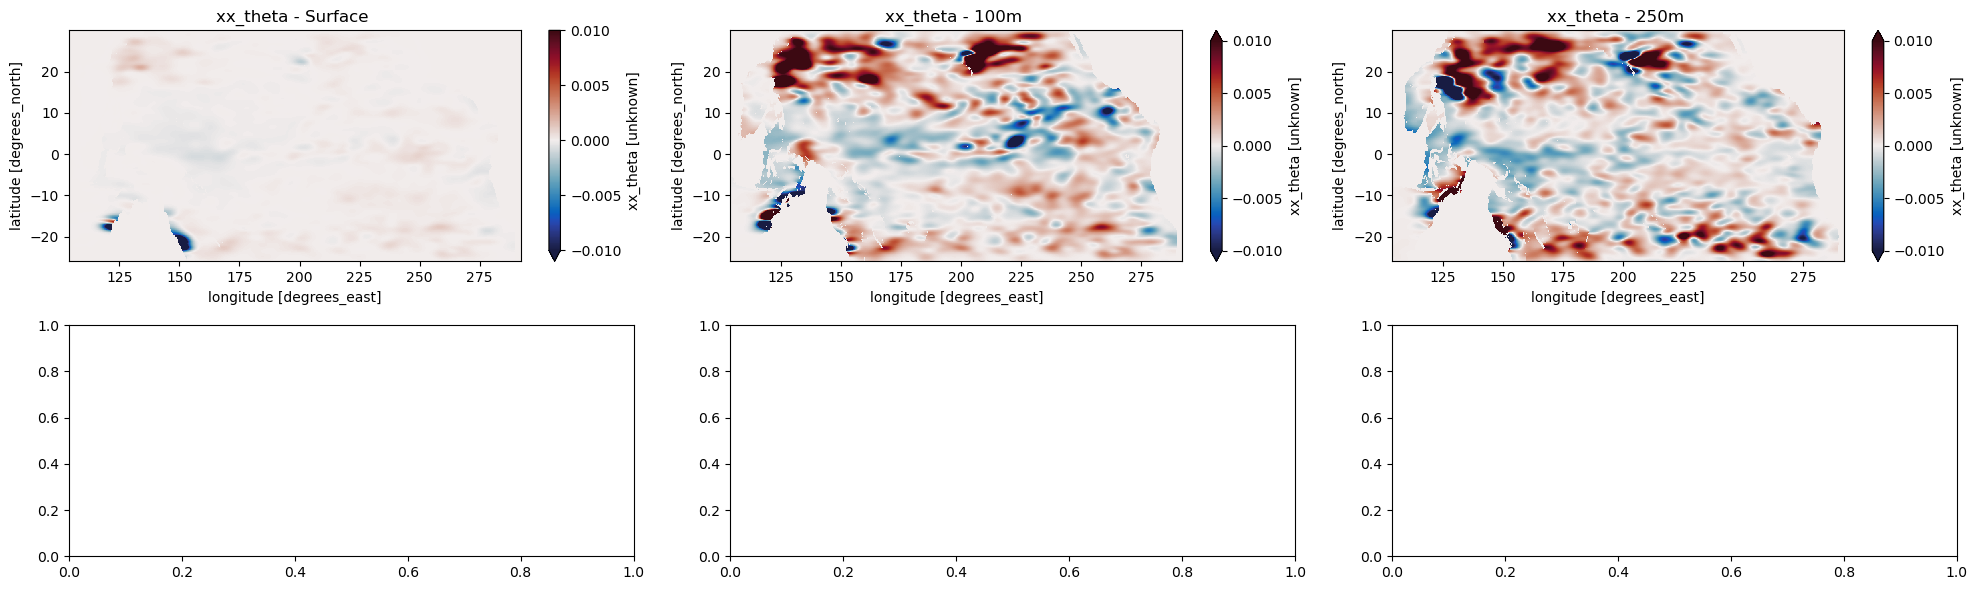

In [47]:
fig, axes = plt.subplots(2, 3, figsize=(20, 6))
ds['xx_theta'].sel(Z=[-1.0],method='nearest').plot(ax=axes[0,0],vmin=-1e-2,vmax=1e-2, cmap=cmo.balance)
axes[0,0].set_title('xx_theta - Surface ')

ds['xx_theta'].sel(Z=[-100.0],method='nearest').plot(ax=axes[0,1],vmin=-1e-2,vmax=1e-2,cmap=cmo.balance)
axes[0,1].set_title('xx_theta - 100m ')

ds['xx_theta'].sel(Z=[-250.0],method='nearest').plot(ax=axes[0,2],vmin=-1e-2,vmax=1e-2,cmap=cmo.balance)
axes[0,2].set_title('xx_theta - 250m ')

ds['xx_theta.effective'].sel(Z=[-1.0],method='nearest').plot(ax=axes[1,0],vmin=10,vmax=31, cmap=cmo.thermal)
axes[1,0].set_title('xx_theta_effective - Surface ')

ds['xx_theta.effective'].sel(Z=[-100.0],method='nearest').plot(ax=axes[1,1],vmin=10,vmax=31,cmap=cmo.thermal)
axes[1,1].set_title('xx_theta_effective - 100m ')

ds['xx_theta.effective'].sel(Z=[-250.0],method='nearest').plot(ax=axes[1,2],vmin=10,vmax=31, cmap=cmo.thermal)
axes[1,2].set_title('xx_theta_effective - 250m ')
    
plt.tight_layout()
plt.show()

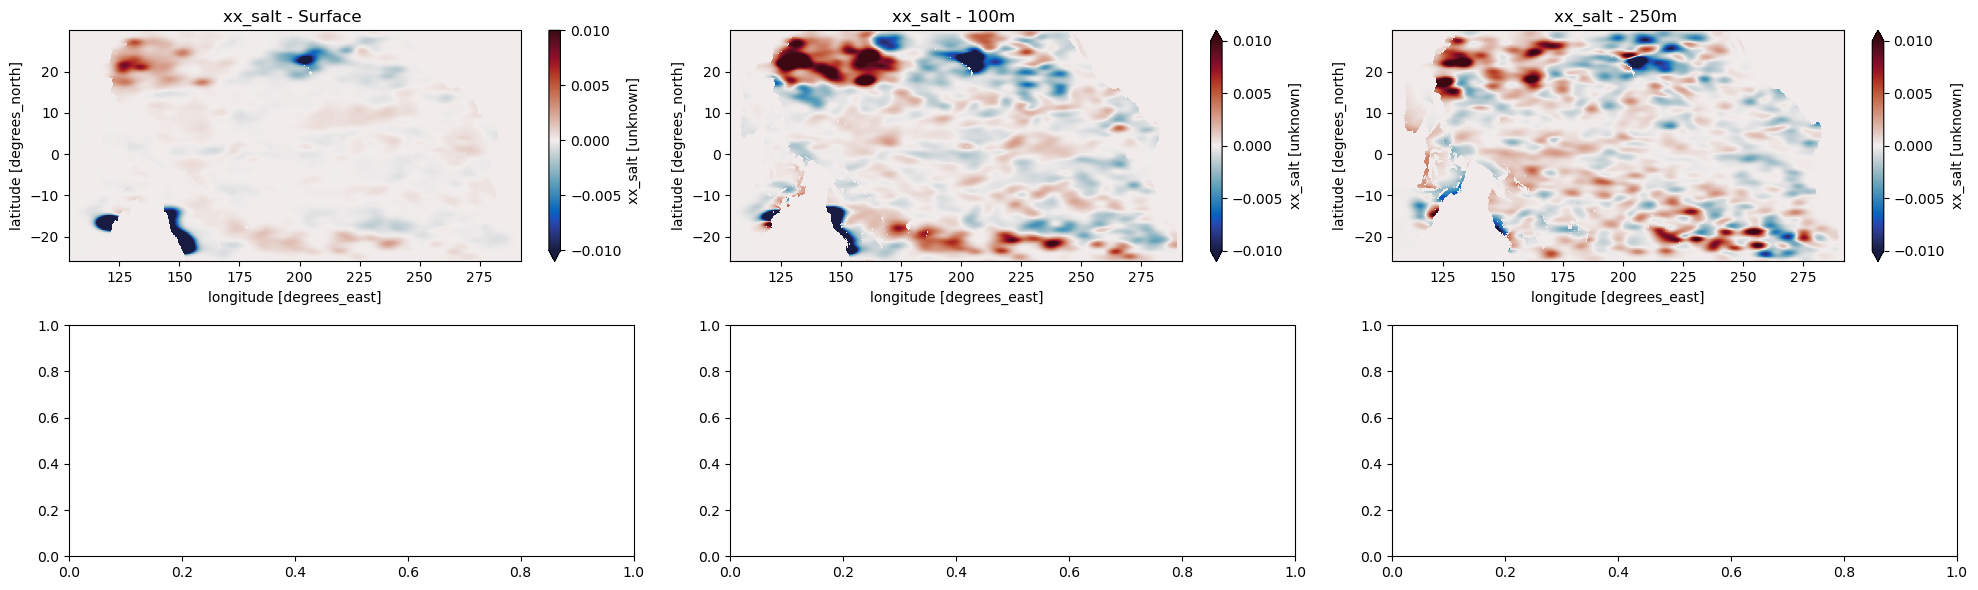

In [48]:
fig, axes = plt.subplots(2, 3, figsize=(20, 6))
ds['xx_salt'].sel(Z=[-1.0],method='nearest').plot(ax=axes[0,0],vmin=-1e-2,vmax=1e-2,cmap=cmo.balance)
axes[0,0].set_title('xx_salt - Surface ')

ds['xx_salt'].sel(Z=[-100.0],method='nearest').plot(ax=axes[0,1],vmin=-1e-2,vmax=1e-2,cmap=cmo.balance)
axes[0,1].set_title('xx_salt - 100m ')

ds['xx_salt'].sel(Z=[-250.0],method='nearest').plot(ax=axes[0,2],vmin=-1e-2,vmax=1e-2,cmap=cmo.balance)
axes[0,2].set_title('xx_salt - 250m ')

ds['xx_salt.effective'].sel(Z=[-1.0],method='nearest').plot(ax=axes[1,0],vmin=31,vmax=36.5, cmap=cmo.haline)
axes[1,0].set_title('xx_salt_effective - Surface ')

ds['xx_salt.effective'].sel(Z=[-100.0],method='nearest').plot(ax=axes[1,1],vmin=31,vmax=36.5, cmap=cmo.haline)
axes[1,1].set_title('xx_salt_effective - 100m ')

ds['xx_salt.effective'].sel(Z=[-250.0],method='nearest').plot(ax=axes[1,2],vmin=31,vmax=36.5, cmap=cmo.haline)
axes[1,2].set_title('xx_salt_effective - 250m ')
    
plt.tight_layout()
plt.show()

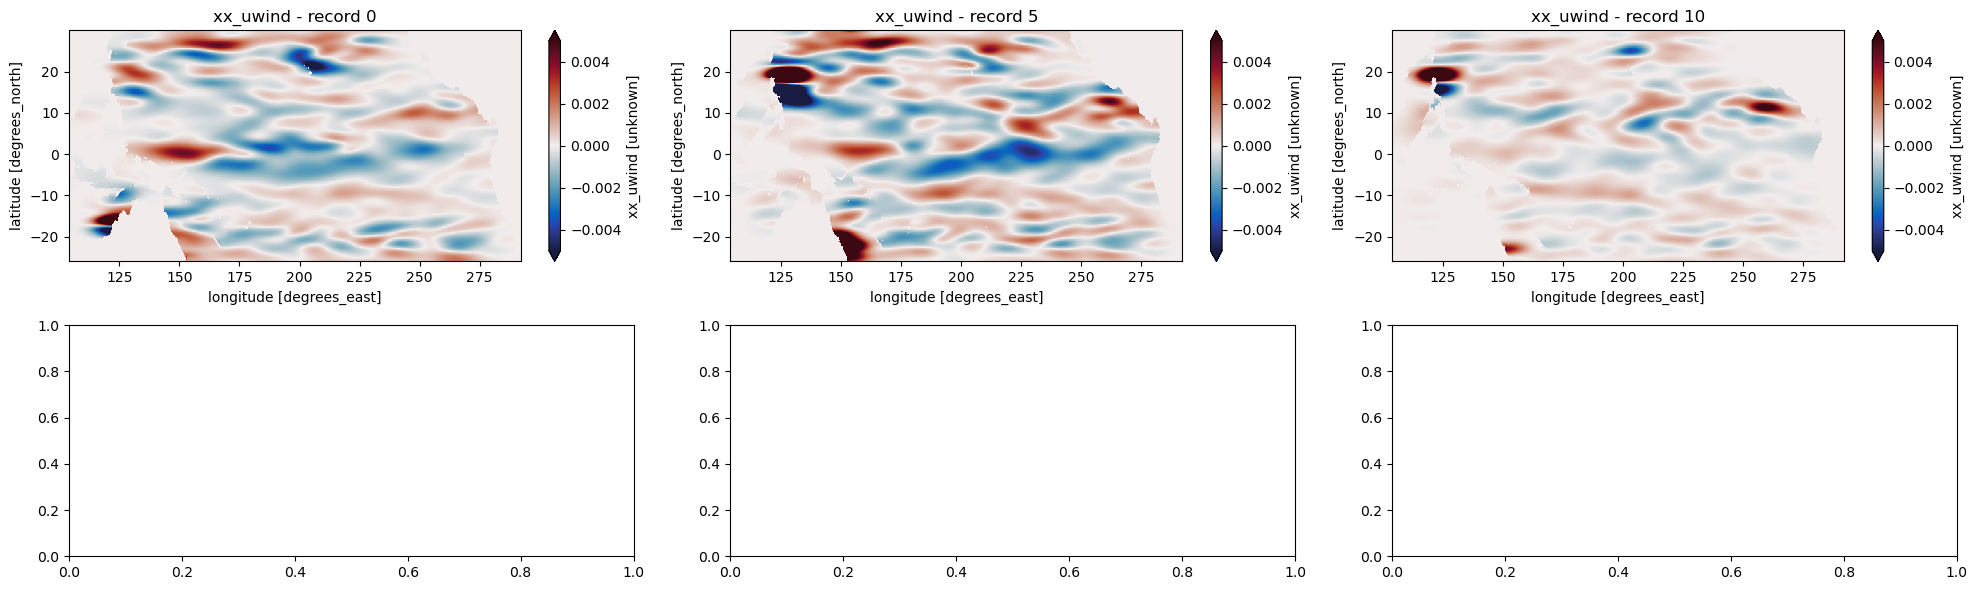

In [49]:
fig, axes = plt.subplots(2, 3, figsize=(20, 6))
ds['xx_uwind'][0].plot(ax=axes[0,0], vmin=-5e-3, vmax=5e-3, cmap=cmo.balance)
axes[0,0].set_title('xx_uwind - record 0')

ds['xx_uwind'][5].plot(ax=axes[0,1],vmin=-5e-3, vmax=5e-3, cmap=cmo.balance)
axes[0,1].set_title('xx_uwind - record 5')

ds['xx_uwind'][10].plot(ax=axes[0,2],vmin=-5e-3, vmax=5e-3, cmap=cmo.balance)
axes[0,2].set_title('xx_uwind - record 10')

ds['xx_uwind.effective'][0].plot(ax=axes[1,0], vmin=-5e-3, vmax=5e-3, cmap=cmo.balance)
axes[1,0].set_title('xx_uwind_effective - record 0 ')

ds['xx_uwind.effective'][5].plot(ax=axes[1,1],vmin=-5e-3, vmax=5e-3, cmap=cmo.balance)
axes[1,1].set_title('xx_uwind_effective - record 5')

ds['xx_uwind.effective'][10].plot(ax=axes[1,2],vmin=-5e-3, vmax=5e-3, cmap=cmo.balance)
axes[1,2].set_title('xx_uwind_effective - record 10')
    
plt.tight_layout()
plt.show()

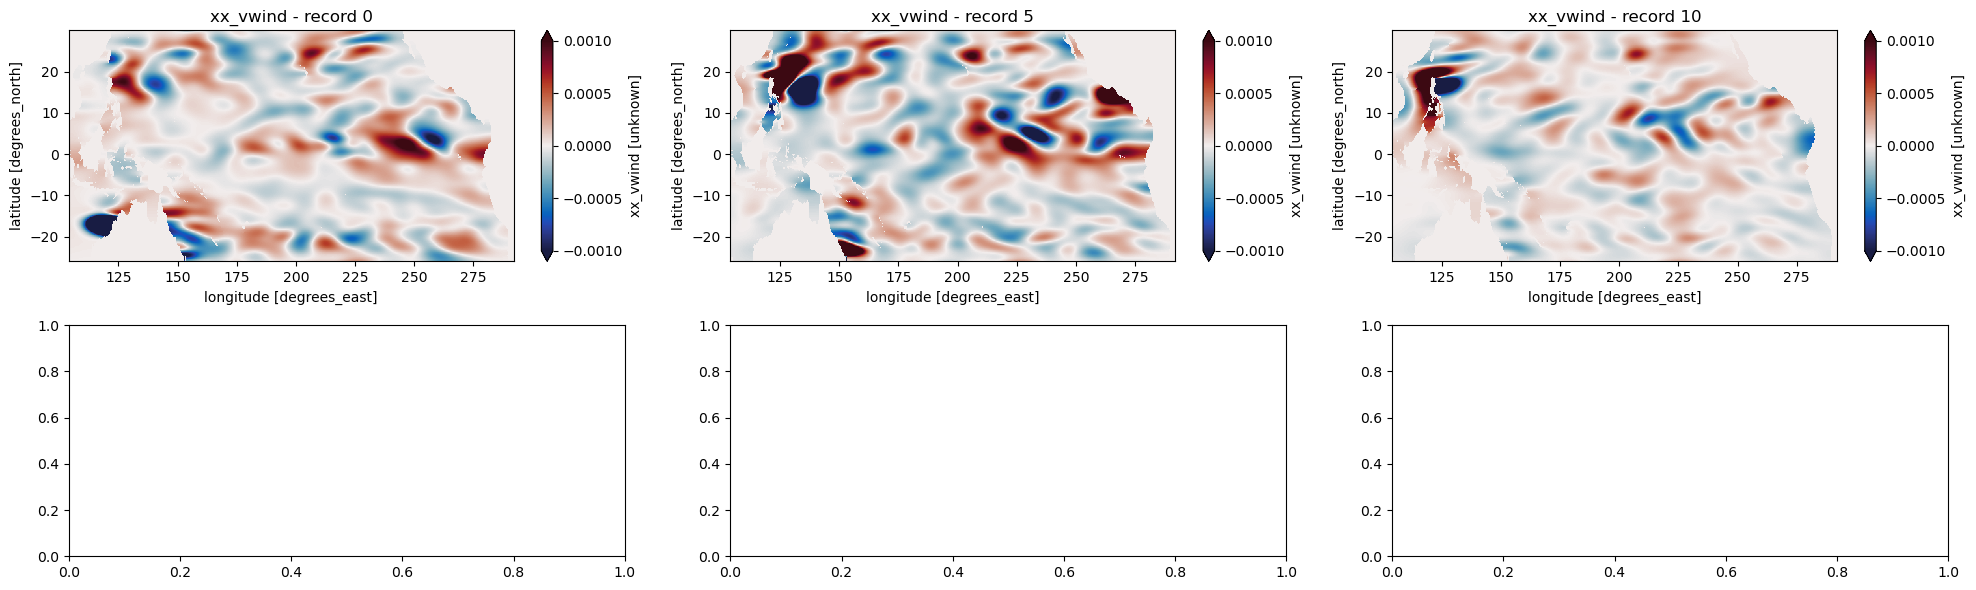

In [50]:
fig, axes = plt.subplots(2, 3, figsize=(20, 6))
ds['xx_vwind'][0].plot(ax=axes[0,0], vmin=-1e-3, vmax=1e-3, cmap=cmo.balance)
axes[0,0].set_title('xx_vwind - record 0')

ds['xx_vwind'][5].plot(ax=axes[0,1],vmin=-1e-3, vmax=1e-3,  cmap=cmo.balance)
axes[0,1].set_title('xx_vwind - record 5')

ds['xx_vwind'][10].plot(ax=axes[0,2],vmin=-1e-3, vmax=1e-3,  cmap=cmo.balance)
axes[0,2].set_title('xx_vwind - record 10')

ds['xx_vwind.effective'][0].plot(ax=axes[1,0], vmin=-1e-3, vmax=1e-3,  cmap=cmo.balance)
axes[1,0].set_title('xx_vwind_effective - record 0 ')

ds['xx_vwind.effective'][5].plot(ax=axes[1,1],vmin=-1e-3, vmax=1e-3,  cmap=cmo.balance)
axes[1,1].set_title('xx_vwind_effective - record 5')

ds['xx_vwind.effective'][10].plot(ax=axes[1,2],vmin=-1e-3, vmax=1e-3,  cmap=cmo.balance)
axes[1,2].set_title('xx_vwind_effective - record 10')
    
plt.tight_layout()
plt.show()

In [ ]:
client.shutdown()